In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Homework 04 - Matplotlib tutorial

#### Excercise 1

Plot exactly two cycles of a sine curve, in any style you choose. Annotate one peak and one trough of the curve.

Is the curve smooth to your eye?

<div class="alert alert-block alert-info">
<b>Recall:</b> One quick way to generate data if you know ahead of time the number of data points you want to create is like by method <strong>A</strong>.
    
But if you don't know how many values you will be generating, or all the values ahead of time, then you can do it by appending data to a list as you go along, then converting it to a <tt>numpy.array</tt>, such as method <strong>B</strong>
</div>

**A**
```python
x,dx = numpy.linspace(start,stop,number,restep=True)
y = numpy.exp(-x)
```
       
**B**
```python
xpoints = []
ypoints = []
for x in numpy.linspace(start,stop,number):
    xpoints.append(x)
    ypoints.append(numpy.exp(-x))
x = numpy.array(xpoints)
y = numpy.array(ypoints)
```

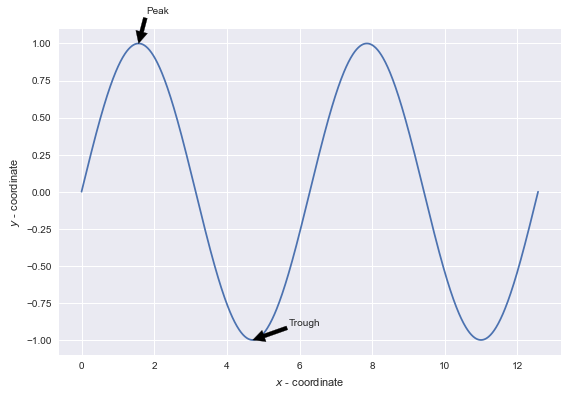

In [13]:
x, dx = np.linspace(0, 4*np.pi, 1000, retstep=True)
y = np.sin(x)

plt.figure(figsize=[9, 6])
plt.plot(x,y)
plt.annotate("Peak", xy=(np.pi/2, 1), xytext=(np.pi/2 + 0.2, 1.2), arrowprops=dict(facecolor='black', shrink=1))
plt.annotate("Trough", xy=(3*np.pi/2, -1), xytext=(3*np.pi/2 + 1, -0.9), arrowprops=dict(facecolor='black', shrink=1))
plt.xlabel("$x$ - coordinate")
plt.ylabel("$y$ - coordinate")

plt.show()


Yes, the curve is indeed smooth to the eye, as I have chosen an adequate number of points when defining:

<code>
x = np.linspace(start, stop, *args, **kwargs)
</code>

#### Excercise 2
The files `dow.txt` and `sunspots.txt` are ordinary text files. You may open them in Word to find check.

Plot the `sunspot.txt` file again, but this time use the `unpack` option of `numpy.loadtxt` to avoid the need to slice the data. Do not use variables `x` or `y`, but directly use the multi-dimensional data returned from `numpy.loadtxt` into `plot.plot` Modify the plot to only plot the first 750 data points.

<div class="alert alert-block alert-info">
<b>Tip:</b> The unix command <tt>file</tt> is the best way to check what type of file format your datafile is.
    
<strong>On Macintosh or Linux:</strong> Open a terminal and type: <tt>file <it>filename</it></tt>
    
<strong>On Windows:</strong> Install <a href="http://gnuwin32.sourceforge.net/packages/file.htm">File for Windows</a>. Open a Command Prompt, and drag the <tt>file</tt> command into the window from it's location at <tt>C:\Program Files (x86)\GnuWin32\bin</tt>. Then drag the file you want to check into the window, and press enter.
</div>

**Answer:** If the data is loaded into variable `d`, then `d[0]` will be the x-axis data, `d[1]` will be the y-axis data, and `d[0,:750]` will be the first 750 points of that data.

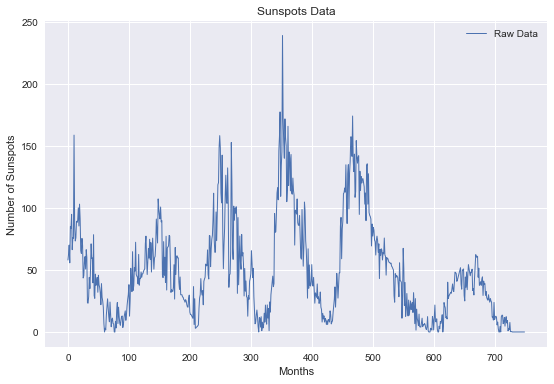

In [14]:
plt.figure(figsize=[9, 6])

sunspots = np.loadtxt("sunspots.txt", unpack=True)
plt.plot(sunspots[0, :750], sunspots[1, :750], linewidth=1, label="Raw Data")
plt.title("Sunspots Data")
plt.xlabel("Months")
plt.ylabel("Number of Sunspots")
plt.legend()

plt.show()

### Excercise 3

Plot the data from the `sunspot.txt` file again, but this time plot a running average of the data, defined by

$$y_k = \frac{1}{2r+1}\sum^{r}_{m=-r}y_{k+m}$$

where $r=5$. Plot the first 500 data points of the original data and running average on the same graph.

Finally, use the command 
```python
    plot.savefig("sunspot_plot.pdf",format="pdf")
```
before your `plot.show()` to save a pdf of your plot.

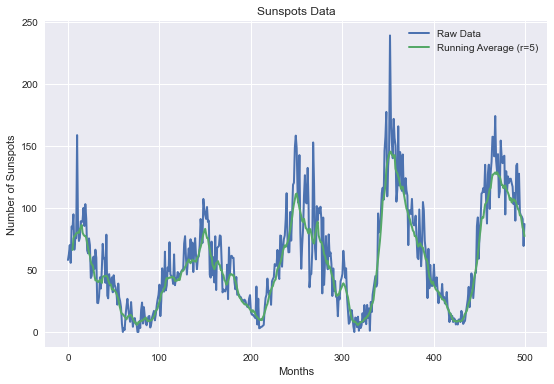

In [15]:
plt.figure(figsize=[9, 6])

sunspots = np.loadtxt("sunspots.txt", unpack=True)
plt.plot(sunspots[0, :500], sunspots[1, :500], linewidth=2, label="Raw Data")

r = 5
runningAverage = np.array(
    [ (1/(2*r + 1)) * sum(sunspots[1, i - r:i + r]) for i in range(sunspots.shape[1]) ]
)
plt.plot(sunspots[0, 5:500], runningAverage[5:500], linewidth=2, label="Running Average (r=5)") # Only plot from point 5:500 as the running sum misbehaves for the first 5 points when r=5

plt.title("Sunspots Data")
plt.xlabel("Months")
plt.ylabel("Number of Sunspots")
plt.legend()

plt.savefig("sunspot_plot.pdf",format="pdf")

plt.show()

### Excercise 4

Make a plot of the so-called deltoid curve, which is a paramteric curve defined by

$$x=2\cos\theta+\cos2\theta,\ \ y=2\sin\theta-\sin2\theta$$

where $0\leq\theta\lt\theta$. Take a set of values of $\theta$ between these limits and calculate $x$ and $y$ for each of them, then plot $y$ as a function of $x$.

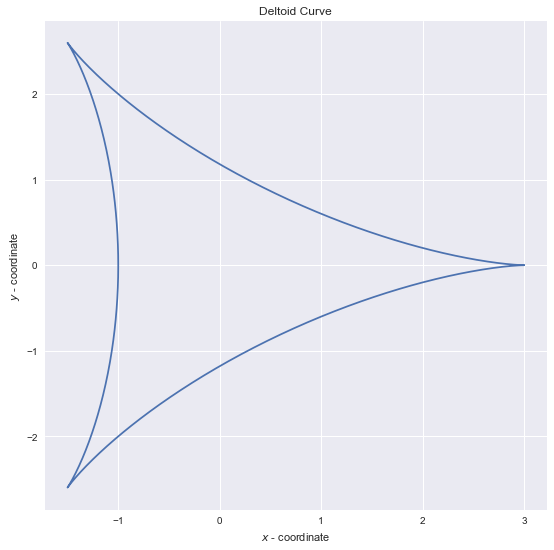

In [16]:
thetaMax = 2*np.pi
theta, dtheta = np.linspace(0, thetaMax, 1000, retstep=True)

x = 2 * np.cos(theta) + np.cos(2 * theta)
y = 2 * np.sin(theta) - np.sin(2 * theta)

plt.figure(figsize=[9,9])
plt.title("Deltoid Curve")
plt.xlabel("$x$ - coordinate")
plt.ylabel("$y$ - coordinate")
plt.plot(x,y)

plt.show()